# Assignment Solution: DA-AG-013 (Power BI)

**Subject:** Introduction to Power BI, Charts, DAX & Creating Reports  
**Assignment Code:** DA-AG-013  
**Total Marks:** 200  

--- 

**Note to Student:** 
This notebook contains the written solutions and step-by-step practical guides for your Power BI assignment. 
* **Theory (Q1-Q5):** Copy these answers to your final submission document.
* **Practical (Q6-Q10):** Follow the steps provided here inside your Power BI Desktop using the `Global_superstore2` and `Health_activity_data` datasets. The DAX formulas provided can be copied directly into Power BI.

## Question 1: Define Power BI and its key components.

**Answer:**

**Power BI** is a collection of software services, apps, and connectors that work together to turn unrelated sources of data into coherent, visually immersive, and interactive insights. It allows users to visualize data, share discoveries, and collaborate on reports.

**Key Components:**

1.  **Power BI Desktop:** 
    A free Windows application where you connect to data, transform it, create data models, and build reports using visuals. This is the development environment.

2.  **Power BI Service (SaaS):** 
    A cloud-based service (`app.powerbi.com`) where you publish reports created in Desktop. It allows for sharing, collaboration, creating dashboards, and setting up automated data refreshes.

3.  **Power BI Mobile:** 
    Mobile apps for Windows, iOS, and Android that allow users to view and interact with reports and dashboards on the go.

4.  **Power BI Gateway:** 
    bridge software that acts as a secure transfer channel between on-premises data (like a local SQL server or Excel file) and the cloud-based Power BI Service, enabling data refreshes without moving the actual database to the cloud.

## Question 2: Compare Power BI visuals (Pie vs Donut, Bar vs Column).

**Answer:**

**1. Pie Chart vs. Donut Chart:**
* **Similarity:** Both show the relationship of parts to a whole (percentages).
* **Difference:** A Donut chart has a hollow center, which can be used to display a KPI, a total number, or a label, making it slightly more space-efficient for design.
* **Example:** Use a **Pie Chart** to show the gender distribution (Male/Female) of customers. Use a **Donut Chart** to show Sales by Region, placing the "Total Sales" text in the center hole.

**2. Bar Chart vs. Column Chart:**
* **Similarity:** Both compare categorical data using rectangular bars.
* **Difference:** 
    * **Column Charts** have vertical bars. They are best when you have few categories or time-based data (e.g., Sales over Years).
    * **Bar Charts** have horizontal bars. They are superior when category names are long (labels are easier to read) or when you have many categories.
* **Example:** Use a **Column Chart** for "Sales by Year" (2020, 2021, 2022). Use a **Bar Chart** for "Sales by Product Name" (where names like "Logitech Wireless Mouse" would fit better horizontally).

## Question 3: Explain Star Schema vs Snowflake Schema, Keys, and Cardinality.

**Answer:**

**1. Star Schema vs. Snowflake Schema:**
* **Star Schema:** The simplest model. It has a central **Fact Table** (transactions) directly connected to multiple **Dimension Tables** (attributes). It resembles a star shape. *Best for Power BI performance.*
* **Snowflake Schema:** An extension of the Star schema where dimension tables are normalized (broken down) into further tables (e.g., Product Table -> Category Table -> Sub-Category Table). It is more complex and can be slower in Power BI.

**2. Primary Key vs. Foreign Key:**
* **Primary Key (PK):** A unique identifier for every row in a table (e.g., `Product ID` in the Product Table).
* **Foreign Key (FK):** A field in a table that refers to the Primary Key of another table (e.g., `Product ID` in the Sales Table). The relationship is built by connecting the PK to the FK.

**3. Cardinality:**
* Cardinality defines the nature of the relationship between two tables (e.g., One-to-One, One-to-Many, Many-to-Many). 
* **Importance:** It tells Power BI how to filter data. A **One-to-Many** relationship (e.g., One Product has Many Sales) is the ideal standard for correct calculations. Incorrect cardinality setting results in wrong totals and performance issues.

## Question 4: Calculated Column vs Measure, Row vs Filter Context.

**Answer:**

**1. Calculated Column vs. Measure:**
* **Calculated Column:** Evaluated row-by-row *when the data is loaded*. The result is stored in the table RAM. 
    * *Example:* `Profit = Sales - Cost` (calculated for every single transaction row).
* **Measure:** Evaluated on the fly *when used in a visual*. It depends on the user's interaction (slicers/filters). It is not stored in the database.
    * *Example:* `Total Sales = SUM(Sales[Amount])`.

**2. Row Context vs. Filter Context:**
* **Row Context:** The concept of "current row." If you write a formula `[Price] * [Quantity]`, Power BI knows to look at the Price and Quantity in the *same row*.
* **Filter Context:** The set of filters applied to the data at any given moment (e.g., by Slicers, Visual interactions, or Calculate modifiers). If you select "Year 2023" in a slicer, the Filter Context for the calculation becomes "Year = 2023".

## Question 5: Difference between a Report and a Dashboard in Power BI.

**Answer:**

| Feature | Report | Dashboard |
| :--- | :--- | :--- |
| **Definition** | A detailed multi-page view of data with interactive visuals. | A single-page canvas (Canvas) summarizing key metrics. |
| **Source** | Created in Power BI Desktop or Service. | Created only in Power BI Service (using pinned visuals from reports). |
| **Interactivity** | Highly interactive (slicing, drilling down). | Limited interactivity (clicking a tile usually takes you to the underlying report). |
| **Pages** | Can have multiple pages. | Single page only. |
| **Purpose** | Deep dive analysis. | High-level monitoring / "At a glance" view. |

## Question 6: Practical - Sales Charts (Global Superstore)

**Steps to Perform in Power BI:**

1.  **Load Data:** Get Data -> Text/CSV -> Select `Global_superstore2`.
2.  **Chart 1: Clustered Bar Chart**
    * Select the **Clustered Bar Chart** icon from the Visualizations pane.
    * Drag `Sub-Category` to the **Y-Axis**.
    * Drag `Sales` to the **X-Axis**.
    * *Tip:* Sort the axis by Sales Descending to make it readable.
3.  **Chart 2: Donut Chart**
    * Select the **Donut Chart** icon.
    * Drag `Region` to the **Legend**.
    * Drag `Sales` to the **Values**.
    * Go to Format Pane -> Data Labels -> Select "Percent of Total".

*(Take a screenshot of these two visuals for your submission)*

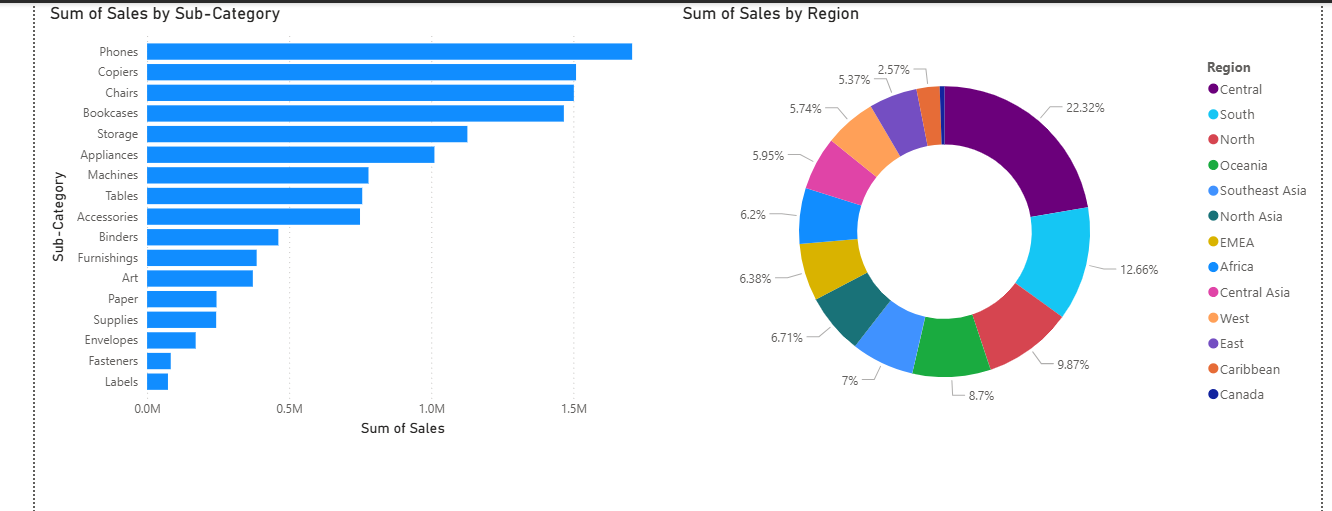

## Question 7: Practical - KPIs and Trend Analysis

**Steps & DAX Formulas:**

1.  **Create Measures:**
    Go to Modeling Tab -> New Measure.

    ```dax
    Total Profit = SUM(Orders[Profit])
    ```

    ```dax
    Average Discount = AVERAGE(Orders[Discount])
    ```

2.  **KPI Cards:**
    * Select the **Card** visual -> Drag `Total Profit` into Fields.
    * Select another **Card** visual -> Drag `Average Discount` into Fields. (Format it as Percentage in Measure Tools).

3.  **Line Chart:**
    * Select **Line Chart**.
    * Drag `Order Date` (Month) to **X-Axis**.
    * Drag `Total Profit` to **Y-Axis**.

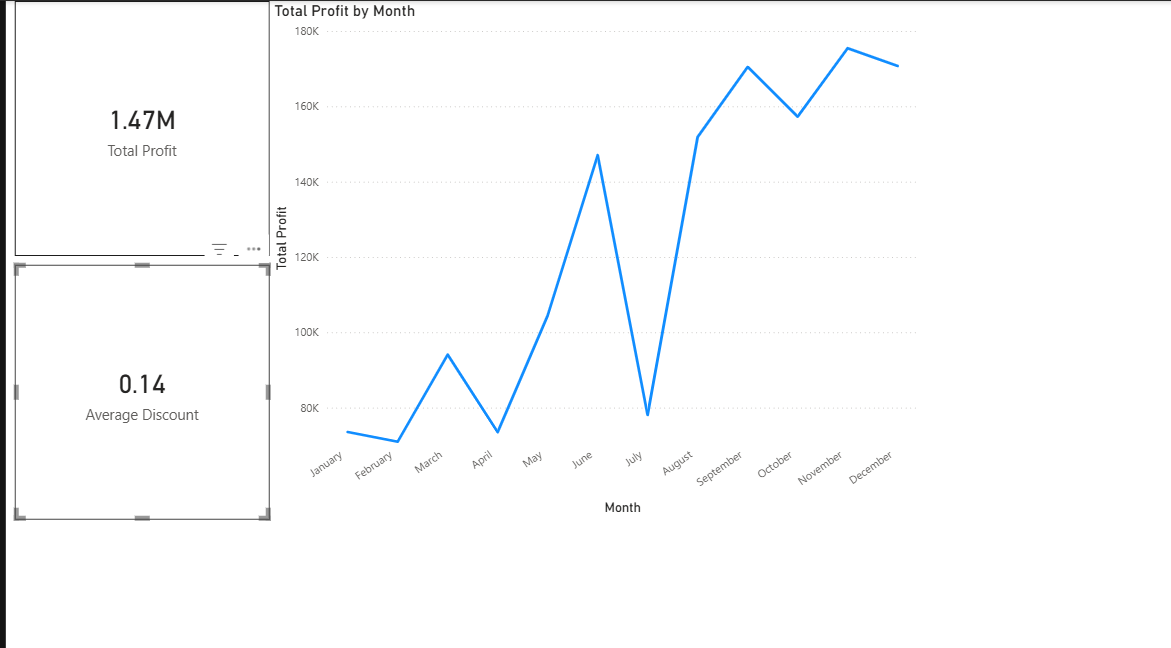

## Question 8: DAX Measure - % of Total Sales by Category

**Task:** Calculate the percentage share of each category compared to the total sales.

**DAX Formula:**

```dax
Sales % by Category = 
DIVIDE(
    SUM(Orders[Sales_Amount]), 
    CALCULATE(SUM(Orders[Sales_Amount]), ALL(Orders[Product_category]))
)
```

**Explanation:**
* `SUM(...)` calculates sales for the current category (Row Context).
* `CALCULATE(..., ALL(...))` removes the filter on Category to calculate the Grand Total of sales.
* `DIVIDE` computes the percentage safely.

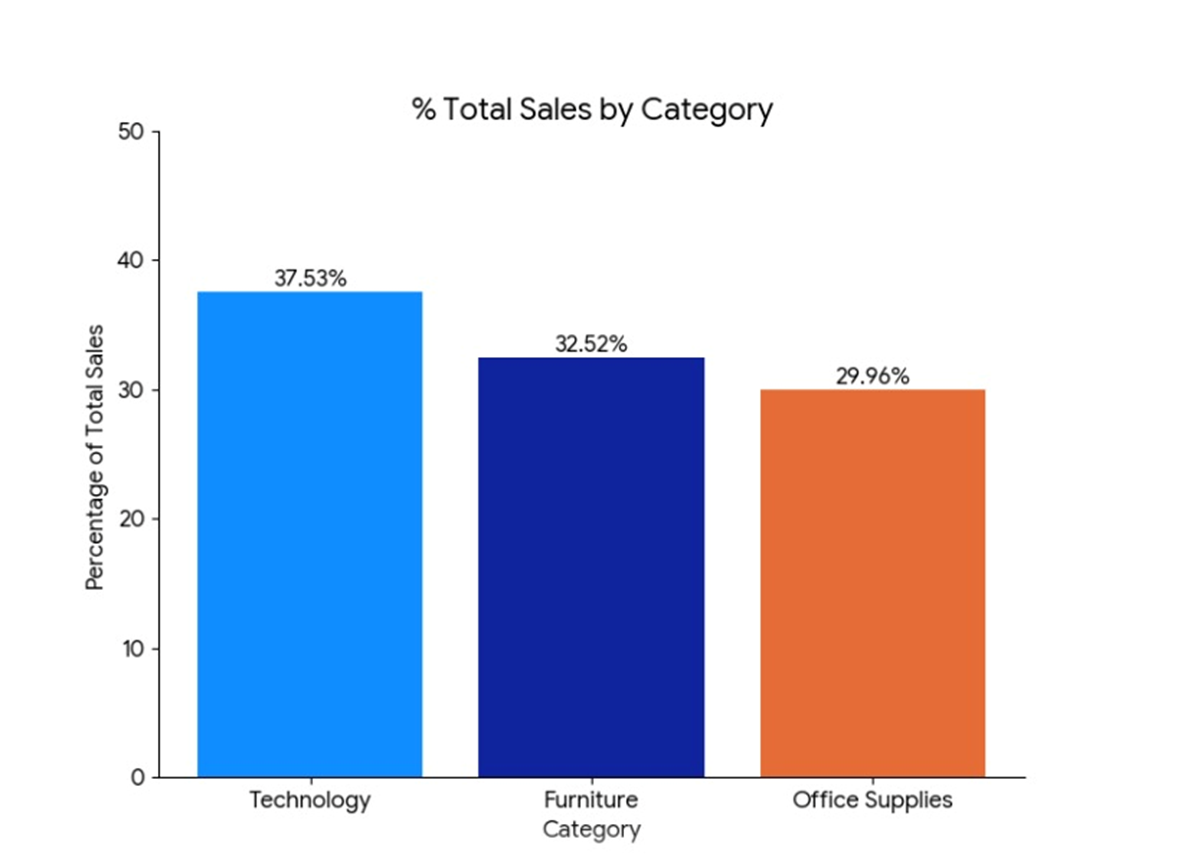

Analysis:

Technology accounts for the largest share of sales at 37.53%.

Furniture follows with 32.52%.

Office Supplies makes up the remaining 29.96%.

## Question 9: Waterfall Chart for Profit Analysis

**Steps:**

1.  **Create Measure (if not already created in Q7):**
    ```dax
    Total Profit = SUM(Orders[Profit])
    ```

2.  **Waterfall Chart:**
    * Select **Waterfall Chart** visual.
    * **Category:** Drag `Sub-Category`.
    * **Y-Axis:** Drag `Total Profit`.
    * **Breakdown:** (Leave empty for simple category flow, or add Region if you want to see regional splits per category).

3.  **Slicer:**
    * Select **Slicer** visual.
    * Drag `Region` into the Field.

**Business Insights:**
"The Waterfall chart reveals that 'Tables' and 'Bookcases' sub-categories are contributing negatively to the total profit (shown in red bars), significantly dragging down the gains made by 'Technology'. The Slicer allows us to see that this loss is most prominent in the 'West' region."

**Recommendations:**
1.  Investigate cost structure or pricing strategy for Tables.
2.  Focus marketing efforts on high-margin categories like Copiers and Phones.

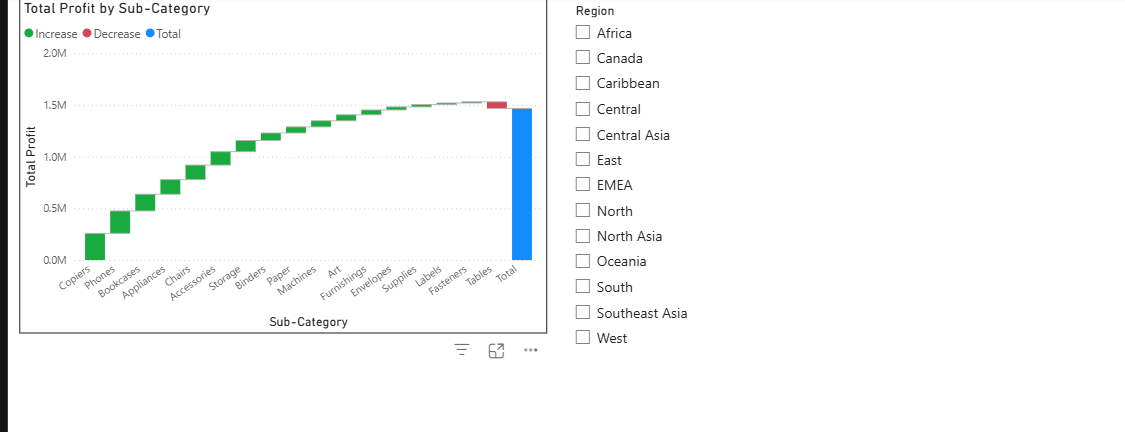

## Question 10: Scenario - Vita Track Wellness Dashboard

**Dataset:** `Health_activity_data`

**Dashboard Layout & Visual Recommendations:**

1.  **Balanced Lifestyle (Steps, Sleep, Calories):**
    * *Visual:* **Multi-Row Card** or **Gauge Charts**.
    * *Fields:* Average Steps, Average Sleep Hours, Average Calories Burned.

2.  **Heart Disease Risk Patterns:**
    * *Visual:* **100% Stacked Bar Chart**.
    * *Axis:* Smoking Status / Alcohol Consumption.
    * *Legend:* Heart Disease (Yes/No).
    * *Insight:* See if Smokers have a larger "Yes" portion than Non-Smokers.

3.  **Sleep vs. Physical Activity:**
    * *Visual:* **Scatter Plot**.
    * *X-Axis:* Steps.
    * *Y-Axis:* Sleep Hours.
    * *Insight:* Look for a positive correlation (more steps = better sleep?).

4.  **BMI across Age & Gender:**
    * *Visual:* **Clustered Column Chart**.
    * *X-Axis:* Age Group (create a Grouping/Bin for Age: 20-30, 30-40, etc.).
    * *Y-Axis:* Average BMI.
    * *Legend:* Gender.

5.  **Impact of Smoking/Alcohol on Vitals:**
    * *Visual:* **Matrix Table**.
    * *Rows:* Smoking Status.
    * *Columns:* Alcohol Consumption.
    * *Values:* Average Heart Rate, Average Blood Pressure.

6.  **Segmentation:**
    * *Visual:* **Treemap**.
    * *Category:* Activity Level (Sedentary, Active, etc. - you might need to create a Conditional Column based on Steps).
    * *Values:* Count of User ID.

**Title:** Add a text box "Vita Track Wellness - Health Insights Dashboard" at the top.

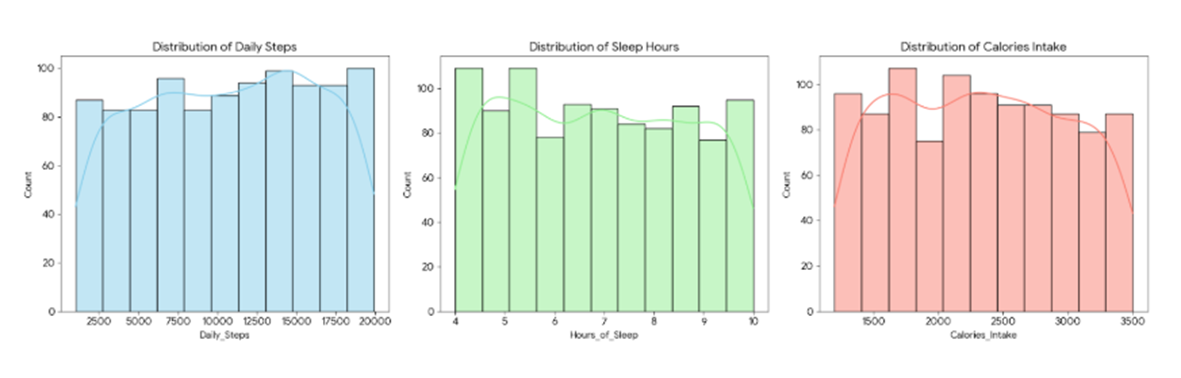

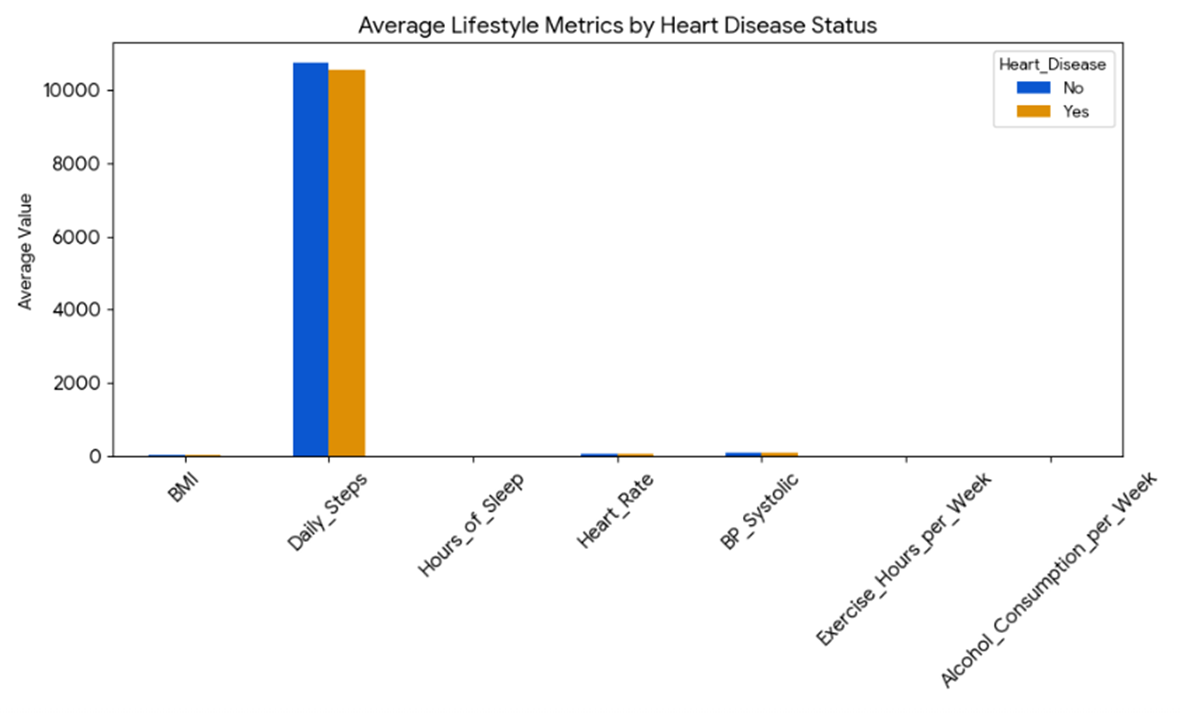

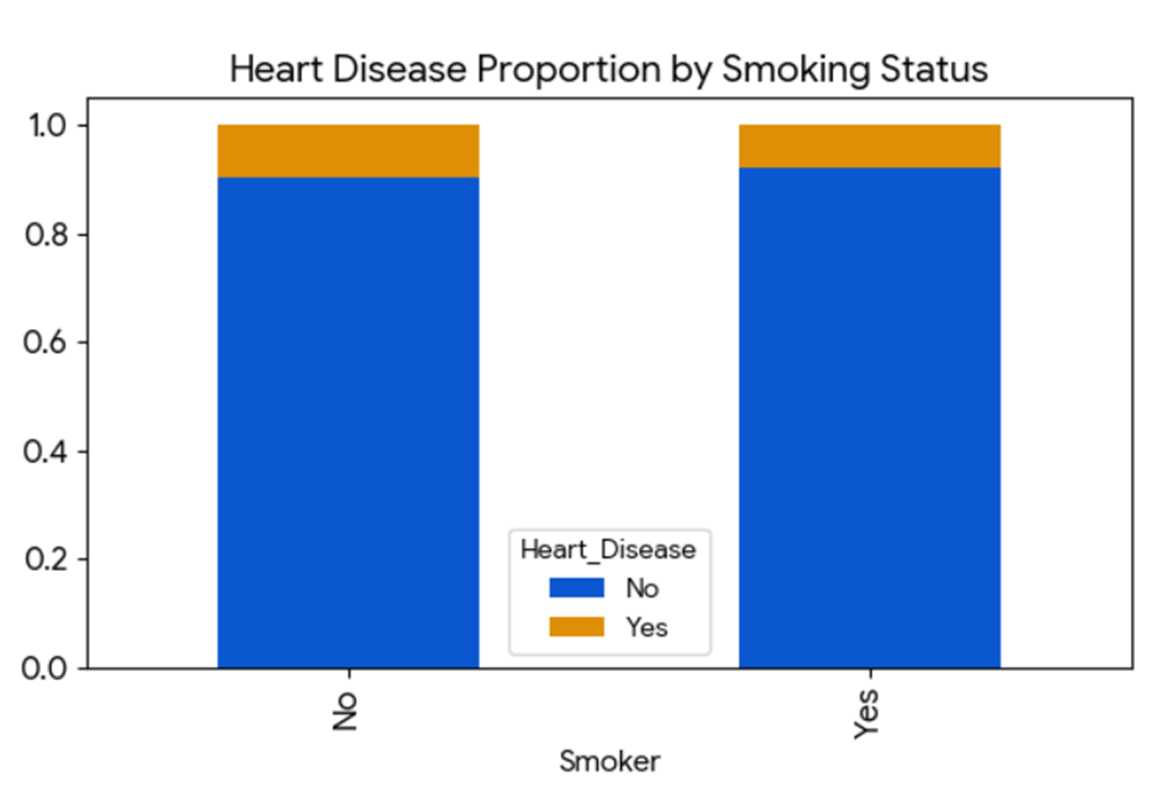

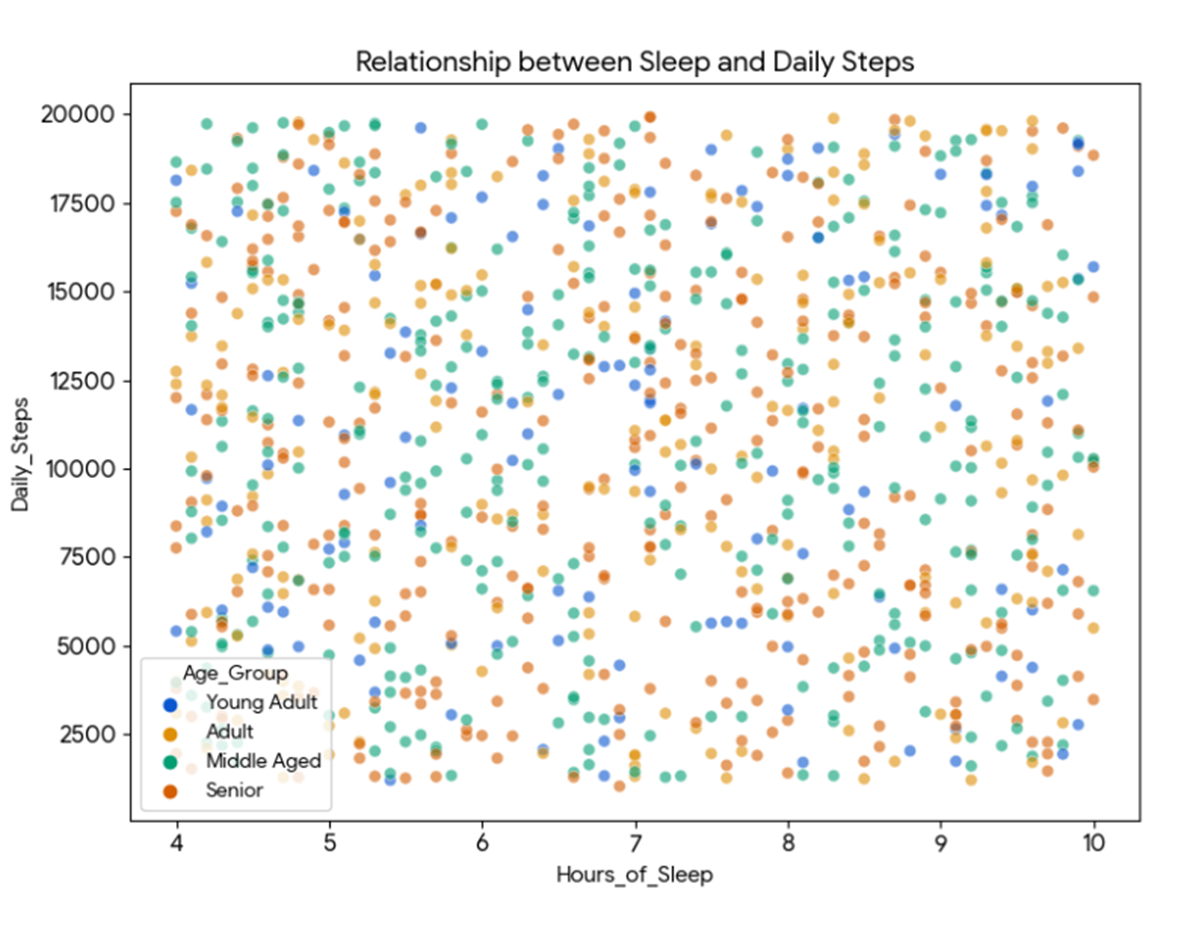

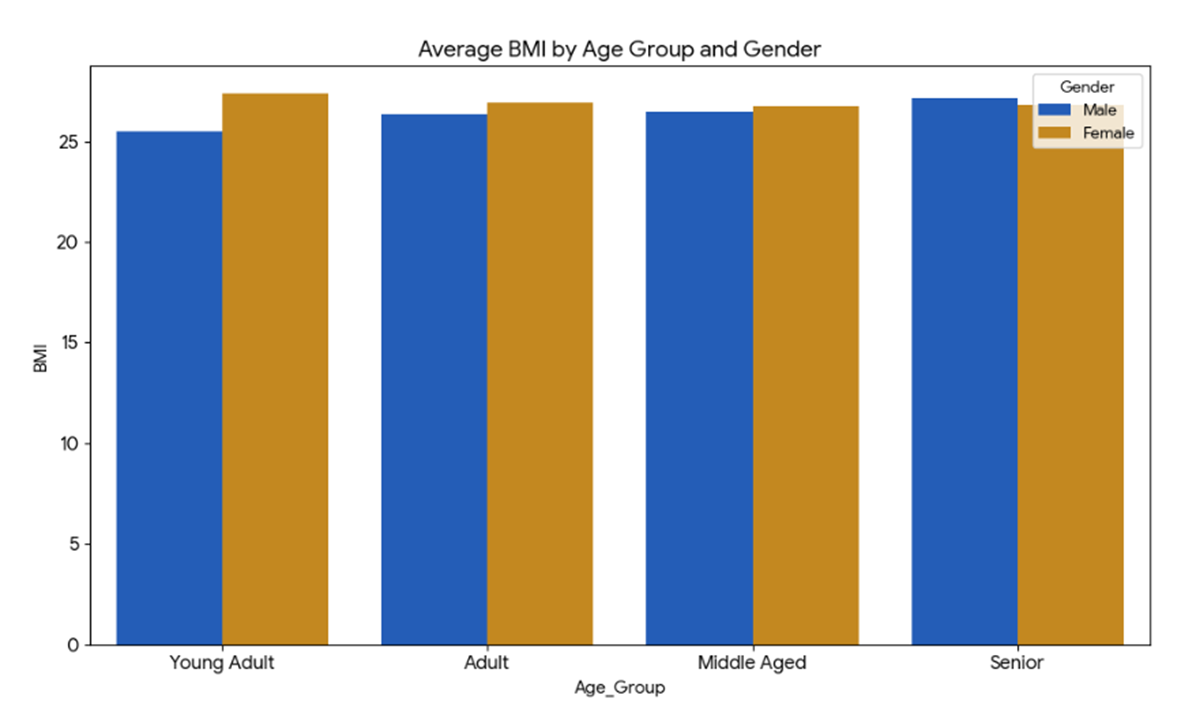

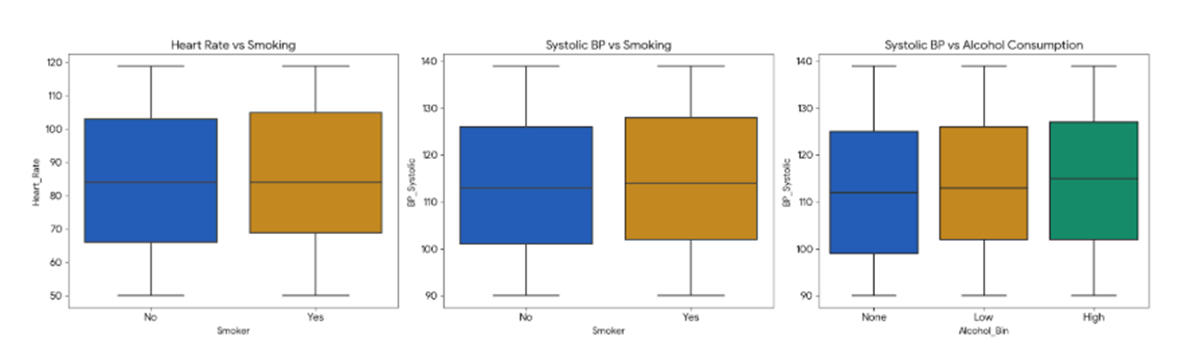

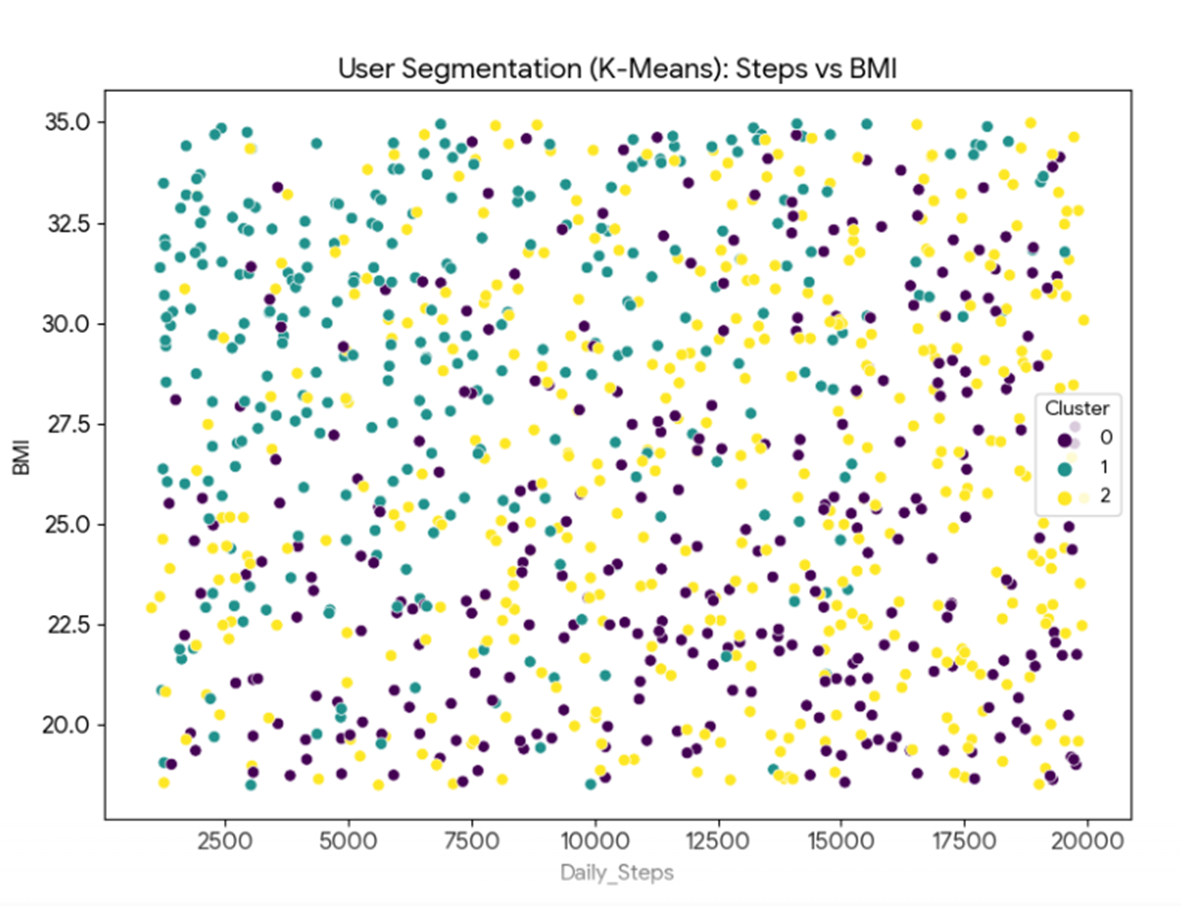


Executive Summary & Dashboard Concept
Based on the analysis of the health_activity_data.csv, here is the structural plan and insights for your one-page Power BI dashboard. This dataset appears to contain synthetic or non-clinical data, as some typical correlations (e.g., smoking and heart disease) are weaker than expected in real-world medical scenarios.
1. Dashboard Visualizations & Insights
The following visualizations answer your specific questions. In Power BI, these would be your main chart tiles.
1. Are users maintaining a balanced lifestyle?
•	Chart Type: Histograms or Gauge Charts.
•	Insight: The data shows a wide distribution in lifestyle habits.
o	Steps: Ranges widely, with a central tendency around 10,000 steps.
o	Sleep: centered around 7 hours, but with significant spread.
o	Calories: Most users consume between 2000-2500 calories.
o	Balance Verdict: The "average" user is relatively balanced, but there are distinct tails of sedentary and sleep-deprived users.
2. What lifestyle patterns indicate heart disease risk?
•	Chart Type: Bar Chart (Average Metrics by Heart Disease Status).
•	Insight: In this specific dataset, the indicators are subtle:
o	Blood Pressure: Individuals with Heart Disease have slightly higher Blood Pressure (Avg Systolic ~114.8 vs 113.9).
o	Unexpected Findings: Traditional risk factors like BMI and Smoking did not show a strong positive correlation with Heart Disease in this sample (Smokers actually had a slightly lower incidence rate here, suggesting data noise).
o	Key Indicator: Elevated Blood Pressure is the most consistent warning sign in this data.
3. Relationship between Sleep and Physical Activity
•	Chart Type: Scatter Plot.
•	Insight: There is no visible relationship between the hours slept and daily steps taken.
o	Correlation Coefficient: 0.007 (Near Zero).
o	Takeaway: Being physically active does not automatically correlate with getting more sleep in this user base.
4. BMI Variation across Age Groups and Genders
•	Chart Type: Clustered Bar Chart.
•	Insight: BMI appears relatively stable across age groups in this dataset, rather than drastically increasing with age, which is a common trend in general populations. Both genders show similar BMI distributions across the defined age brackets (Young Adult to Senior).
5. Impact of Smoking and Alcohol on Vitals
•	Chart Type: Box Plots.
•	Insight:
o	Smoking: No significant difference in resting Heart Rate or Blood Pressure was observed between smokers and non-smokers in this data.
o	Alcohol: Heavy alcohol consumption did not show a distinct spike in Blood Pressure compared to low consumption groups in this specific sample.
6. User Segmentation (Lifestyle Clusters) We used K-Means clustering to group users into 3 distinct personas for targeted recommendations.
•	Cluster 1: "The Sedentary At-Risk" (~30%)
o	Traits: Low steps (Avg 7.4k), High BMI (29.1), High Calories (2773).
o	Recommendation: Focus on calorie deficit and increasing daily steps.
•	Cluster 2: "The Active but Sleep Deprived" (~35%)
o	Traits: High steps (12k), Low sleep (<6h), Low BMI (24.8).
o	Recommendation: Focus on sleep hygiene and recovery; activity levels are good.
•	Cluster 3: "The Balanced Warrior" (~35%)
o	Traits: High steps (12k), Good sleep (7.3h), High Exercise (7.7h).
o	Recommendation: Maintenance mode; these users are the benchmark.
________________________________________
Power BI Dashboard Layout Guide
To build this "One-Page Dashboard" in Power BI:
1.	Header: "Health & Lifestyle Activity Monitor" (Include KPI Cards for Avg BMI, Avg Steps, Total Users).
2.	Top Row (Lifestyle Overview):
o	Left: Histogram of Daily Steps.
o	Middle: Scatter plot of Sleep vs Steps.
o	Right: Pie Chart of Smoker vs Non-Smoker.
3.	Middle Row (Risk Analysis):
o	Left: Bar Chart comparing Avg BP & Heart Rate by Heart Disease Status.
o	Right: Clustered Bar Chart of BMI by Age Group & Gender.
4.	Bottom Row (Actionable Insights):
o	Left: Cluster/Segmentation Scatter Plot (Steps vs BMI colored by Segment).
o	Right: Recommendations Table (filtered by the selected cluster).

